# Python Analysis Homework

### Required packages

In [1]:
import matplotlib as plt
import numpy as np
import pandas as pd
import seaborn as sns

### 1. Read data

In [2]:
fires = pd.read_csv("forest-fires.csv")

In [3]:
fires.head(3)

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,NaN
1,7,4,oct,tue,18.0,0.9,0.0,NaN
2,7,4,oct,sat,14.6,1.3,0.0,NaN


In [4]:
fires.describe()

,X,Y,temp,wind,rain,area
count,517.000000,517.000000,515.000000,516.000000,517.000000,379.000000
mean,4.669246,4.299807,18.904272,4.019380,0.021663,17.525198
std,2.313778,1.229900,5.801947,1.792934,0.295959,73.818628
min,1.000000,2.000000,2.200000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,15.550000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,19.300000,4.000000,0.000000,2.570000
75%,7.000000,5.000000,22.800000,4.900000,0.000000,9.985000
max,9.000000,9.000000,33.300000,9.400000,6.400000,1090.840000


In [5]:
fires.shape

(517, 8)

The column names are:

### 2. Missing data

#### Table of missing values

In [6]:
fires.isnull().sum().reset_index()

,index,0
0,X,0
1,Y,0
2,month,0
3,day,0
4,temp,2
5,wind,1
6,rain,0
7,area,138


The variables `temp`, `wind`, and `area` have missing values.

In [7]:
print(
    "In total, there are",
    fires.isnull().sum().sum(),
    "missing values."
)

In total, there are 141 missing values.


#### Replace missing values

In [8]:
fires = fires.fillna({
    "area": 0
})

In [9]:
print(
    "Now, there are",
    fires.isnull().sum().sum(),
    "missing values remaining in the data set."
)

Now, there are 3 missing values remaining in the data set.


#### Remove rows with NA values

In [10]:
fires = fires.dropna(how = "any", axis = 0)

In [11]:
print(
    "Now, there are",
    fires.isnull().sum().sum(),
    "missing values remaining in the data set."
)

Now, there are 0 missing values remaining in the data set.


### 3. Using verbs in `pandas`

#### Select

In [12]:
# The argument axis = 1 specifies that we want to drop columns
fires = fires.drop(["X", "Y"], axis = 1)

#### Arrange

In [13]:
fires = fires.sort_values("area", ascending = False)

#### Filter

In [14]:
fires = fires[fires["area"] != 0]

#### Mutate

In [15]:
fires["is_rain"] = fires["rain"] > 0

#### Final version of the `fires` data frame

In [16]:
fires

,month,day,temp,wind,rain,area,is_rain
238,sep,sat,25.1,4.0,0.0,1090.84,False
415,aug,thu,27.5,4.9,0.0,746.28,False
479,jul,mon,22.6,4.9,0.0,278.53,False
237,sep,tue,18.8,2.2,0.0,212.88,False
236,sep,sat,18.2,1.8,0.0,200.94,False
...,...,...,...,...,...,...,...
439,sep,fri,19.1,2.2,0.0,0.33,False
251,aug,wed,24.0,3.1,0.0,0.24,False
252,aug,wed,22.1,3.6,0.0,0.21,False
266,aug,tue,19.4,4.0,0.0,0.17,False


#### Group by and summarise

##### Average area of fire per month

In [17]:
fires.groupby("month")["area"].mean().reset_index().sort_values("area", ascending = False)

,month,area
7,may,38.480000
9,sep,31.815773
4,jul,25.546111
1,aug,23.441939
0,apr,20.005000
8,oct,19.914000
2,dec,13.330000
3,feb,12.550000
5,jun,12.412500
6,mar,12.382105


##### Average area of fire per day

In [18]:
fires.groupby("day")["area"].mean().reset_index().sort_values("area", ascending = False)

,day,area
2,sat,51.068095
4,thu,32.164516
5,tue,22.438611
3,sun,20.424043
6,wed,18.642581
1,mon,18.116154
0,fri,10.400930


##### Average area of fire dependant on rain

In [19]:
fires.groupby("is_rain")["area"].mean().reset_index().sort_values("area", ascending = False)

,is_rain,area
0,False,24.825393
1,True,6.495000


### 4. Plotting

#### `matplotlib` histogram of `area`

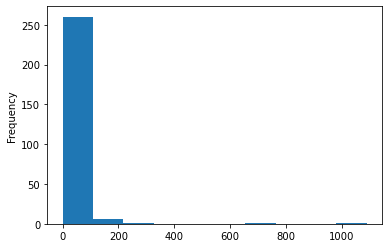

In [20]:
fires["area"].plot(kind = "hist")

#### `seaborn` histogram of `area`

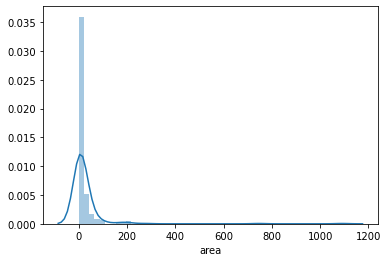

In [21]:
sns.distplot(fires["area"])

#### `seaborn` scatter plot of `temp` against `area`

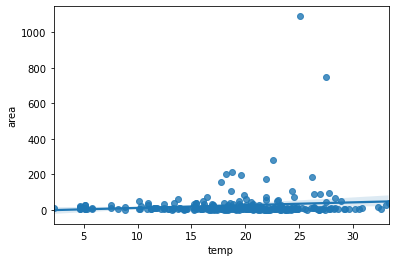

In [22]:
sns.regplot(x = "temp", y = "area", data = fires)